In [1]:
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession, dataframe
import plotly.express as px
from pyspark.sql.functions import sum, max
geojson = px.data.gapminder()
# create sparksession
spark = SparkSession \
    .builder \
    .appName("CS531Task1") \
    .getOrCreate()

In [2]:
sc = spark.sparkContext

In [3]:
# Utility function to write query plans to a file
# you will be using this to understand how your queries are being processed
def write_explain(df: dataframe.DataFrame, output_path: str = "out.txt"):
    from contextlib import redirect_stdout
    with open(output_path, "w") as f:
        with redirect_stdout(f):
            df.explain(extended=True)

In [4]:
%%timeit
sdf = spark.read.csv("../data/StateAndCountyData.csv", header=True)

292 ms ± 56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
sdf = spark.read.csv("../data/StateAndCountyData.csv", header=True)
sdf.columns

['FIPS', 'State', 'County', 'Variable_Code', 'Value']

In [6]:
#Trimming the spaces in column in State
from pyspark.sql.functions import trim

sdf = sdf.withColumn("State", trim(sdf["State"]))

In [7]:
#Converting Value column from string to float
from pyspark.sql.functions import col

sdf = sdf.withColumn("Value", col("Value").cast("float"))
sdf.show()

+----+-----+-------+--------------------+----------+
|FIPS|State| County|       Variable_Code|     Value|
+----+-----+-------+--------------------+----------+
|1001|   AL|Autauga|       LACCESS_POP10|  18428.44|
|1001|   AL|Autauga|       LACCESS_POP15| 17496.693|
|1001|   AL|Autauga|PCH_LACCESS_POP_1...|-5.0560255|
|1001|   AL|Autauga|   PCT_LACCESS_POP10| 33.769657|
|1001|   AL|Autauga|   PCT_LACCESS_POP15| 32.062256|
|1001|   AL|Autauga|      LACCESS_LOWI10| 5344.4272|
|1001|   AL|Autauga|      LACCESS_LOWI15|  6543.677|
|1001|   AL|Autauga|PCH_LACCESS_LOWI_...| 22.439249|
|1001|   AL|Autauga|  PCT_LACCESS_LOWI10|   9.79353|
|1001|   AL|Autauga|  PCT_LACCESS_LOWI15| 11.991125|
|1001|   AL|Autauga|      LACCESS_HHNV10|  664.2165|
|1001|   AL|Autauga|      LACCESS_HHNV15|  677.6728|
|1001|   AL|Autauga|PCH_LACCESS_HHNV_...|  2.025888|
|1001|   AL|Autauga|  PCT_LACCESS_HHNV10| 3.2847855|
|1001|   AL|Autauga|  PCT_LACCESS_HHNV15| 3.3513317|
|1001|   AL|Autauga|      LACCESS_SNAP15|  931

In [8]:
print(sdf.schema['Value'].dataType)

FloatType()


In [9]:
#Filtering rows having 2011 year's grocery info"
groceryStores2011 = sdf.select("State", "County", "Variable_Code", "Value").filter(sdf["Variable_Code"] == "GROCPTH11")
print(groceryStores2011.count())
print(groceryStores2011.columns)

3143
['State', 'County', 'Variable_Code', 'Value']


In [10]:
dfAZ = groceryStores2011.filter(groceryStores2011['State'] == 'KS')
dfAZ.show()

+-----+----------+-------------+-----------+
|State|    County|Variable_Code|      Value|
+-----+----------+-------------+-----------+
|   KS|     Allen|    GROCPTH11| 0.14993627|
|   KS|  Anderson|    GROCPTH11|  0.3722546|
|   KS|  Atchison|    GROCPTH11| 0.17906171|
|   KS|    Barber|    GROCPTH11|  1.2180268|
|   KS|    Barton|    GROCPTH11| 0.14438869|
|   KS|   Bourbon|    GROCPTH11| 0.13385984|
|   KS|     Brown|    GROCPTH11|0.100280784|
|   KS|    Butler|    GROCPTH11| 0.12153252|
|   KS|     Chase|    GROCPTH11| 0.36127168|
|   KS|Chautauqua|    GROCPTH11| 0.27708507|
|   KS|  Cherokee|    GROCPTH11|  0.2341701|
|   KS|  Cheyenne|    GROCPTH11|  1.4853324|
|   KS|     Clark|    GROCPTH11|  0.4716981|
|   KS|      Clay|    GROCPTH11| 0.11728829|
|   KS|     Cloud|    GROCPTH11| 0.21238187|
|   KS|    Coffey|    GROCPTH11|  0.2356823|
|   KS|  Comanche|    GROCPTH11|  1.0638298|
|   KS|    Cowley|    GROCPTH11| 0.11039051|
|   KS|  Crawford|    GROCPTH11| 0.15312372|
|   KS|   

In [11]:
total_sum = dfAZ.agg(sum("Value").alias("total_sum"))

# Show the result
total_sum.show()

+-----------------+
|        total_sum|
+-----------------+
|36.00174254924059|
+-----------------+



In [12]:
dfAZ.agg(sum("Value")).show()

+-----------------+
|       sum(Value)|
+-----------------+
|36.00174254924059|
+-----------------+



In [13]:
#Select required columns
groceryStores2016 = sdf.select("State", "County", "Variable_Code", "Value").filter(sdf["Variable_Code"] == "GROCPTH16")
print(groceryStores2016.count())
print(groceryStores2016.columns)

3143
['State', 'County', 'Variable_Code', 'Value']


In [14]:
groceryStores2016.show()

+-----+---------+-------------+----------+
|State|   County|Variable_Code|     Value|
+-----+---------+-------------+----------+
|   AL|  Autauga|    GROCPTH16| 0.0542711|
|   AL|  Baldwin|    GROCPTH16|0.13975297|
|   AL|  Barbour|    GROCPTH16|0.15519516|
|   AL|     Bibb|    GROCPTH16|0.22091636|
|   AL|   Blount|    GROCPTH16|0.08686286|
|   AL|  Bullock|    GROCPTH16| 0.2873288|
|   AL|   Butler|    GROCPTH16|0.15026297|
|   AL|  Calhoun|    GROCPTH16|0.23482345|
|   AL| Chambers|    GROCPTH16| 0.2076104|
|   AL| Cherokee|    GROCPTH16|0.19405419|
|   AL|  Chilton|    GROCPTH16|0.11407711|
|   AL|  Choctaw|    GROCPTH16|0.22988506|
|   AL|   Clarke|    GROCPTH16|0.24640657|
|   AL|     Clay|    GROCPTH16|0.22371365|
|   AL| Cleburne|    GROCPTH16|0.13447186|
|   AL|   Coffee|    GROCPTH16|0.13667338|
|   AL|  Colbert|    GROCPTH16|0.14725643|
|   AL|  Conecuh|    GROCPTH16|0.07990412|
|   AL|    Coosa|    GROCPTH16| 0.0925155|
|   AL|Covington|    GROCPTH16|0.16048789|
+-----+----

In [15]:
#State wise sum of grocery stores per 1000 people in 2011
from pyspark.sql import functions as F

stateWiseSum2011 = (groceryStores2011
                    .groupBy("State")
                    .agg((F.sum("Value") / F.countDistinct("County")).cast("float")
                         .alias("Grocery Stores per 1000 people in 2011"))
                   )
stateWiseSum2011.show(51)

+-----+--------------------------------------+
|State|Grocery Stores per 1000 people in 2011|
+-----+--------------------------------------+
|   SC|                            0.19876717|
|   AZ|                            0.14468507|
|   LA|                            0.22087158|
|   MN|                            0.27297828|
|   NJ|                              0.271296|
|   DC|                            0.28049314|
|   OR|                            0.33507088|
|   VA|                            0.22909123|
|   RI|                            0.16916852|
|   KY|                            0.22006683|
|   WY|                            0.26851052|
|   NH|                            0.23924553|
|   MI|                            0.25252953|
|   NV|                            0.28536123|
|   WI|                            0.20500275|
|   ID|                            0.27207255|
|   CA|                            0.27435142|
|   NE|                             0.5128809|
|   CT|      

In [16]:
#State wise sum of grocery stores per 1000 people in 2016
from pyspark.sql import functions as F

stateWiseSum2016 = (groceryStores2016
                    .groupBy("State")
                    .agg((F.sum("Value") / F.countDistinct("County")).cast("float")
                         .alias("Grocery Stores per 1000 people in 2016"))
                   )
stateWiseSum2016.show(51)

+-----+--------------------------------------+
|State|Grocery Stores per 1000 people in 2016|
+-----+--------------------------------------+
|   SC|                             0.1743405|
|   AZ|                            0.14552121|
|   LA|                            0.19431935|
|   MN|                            0.26038274|
|   NJ|                            0.26881546|
|   DC|                            0.27179632|
|   OR|                            0.28742978|
|   VA|                             0.2201266|
|   RI|                            0.17477185|
|   KY|                             0.1985702|
|   WY|                            0.24473523|
|   NH|                            0.21243803|
|   MI|                            0.24748085|
|   NV|                             0.2723688|
|   WI|                            0.20111148|
|   ID|                            0.28282478|
|   CA|                             0.2600602|
|   NE|                             0.4714086|
|   CT|      

In [17]:
joined_df = stateWiseSum2016.join(stateWiseSum2011, 'State')
joined_df.show()

+-----+--------------------------------------+--------------------------------------+
|State|Grocery Stores per 1000 people in 2016|Grocery Stores per 1000 people in 2011|
+-----+--------------------------------------+--------------------------------------+
|   SC|                             0.1743405|                            0.19876717|
|   AZ|                            0.14552121|                            0.14468507|
|   LA|                            0.19431935|                            0.22087158|
|   MN|                            0.26038274|                            0.27297828|
|   NJ|                            0.26881546|                              0.271296|
|   DC|                            0.27179632|                            0.28049314|
|   OR|                            0.28742978|                            0.33507088|
|   VA|                             0.2201266|                            0.22909123|
|   RI|                            0.17477185|        

In [18]:
joined_df.createOrReplaceTempView("grocery_stores")

query = """SELECT 
    *,
    (`Grocery Stores per 1000 people in 2016` - `Grocery Stores per 1000 people in 2011`) AS Change
FROM 
    grocery_stores
ORDER BY 
    Change DESC
LIMIT 3"""

# Execute the query
topStates = spark.sql(query)

# Show the result
topStates.show()

+-----+--------------------------------------+--------------------------------------+-----------+
|State|Grocery Stores per 1000 people in 2016|Grocery Stores per 1000 people in 2011|     Change|
+-----+--------------------------------------+--------------------------------------+-----------+
|   AK|                            0.72680545|                            0.69263047| 0.03417498|
|   CO|                             0.3942081|                             0.3689442|0.025263906|
|   MA|                            0.26548636|                            0.24436969|0.021116674|
+-----+--------------------------------------+--------------------------------------+-----------+



In [19]:
#Plotting bar graph

# Collect data from Spark DataFrame
top3States = topStates.collect()

In [20]:
# Convert to Pandas DataFrame
results_df = pd.DataFrame([(row.State, row["Grocery Stores per 1000 people in 2011"], row["Grocery Stores per 1000 people in 2016"]) for row in top3States],
                          columns=["State", "Grocery Stores per 1000 people in 2011", "Grocery Stores per 1000 people in 2016"])

In [21]:
results_df

,State,Grocery Stores per 1000 people in 2011,Grocery Stores per 1000 people in 2016
0,AK,0.692630,0.726805
1,CO,0.368944,0.394208
2,MA,0.244370,0.265486


<Axes: xlabel='State'>

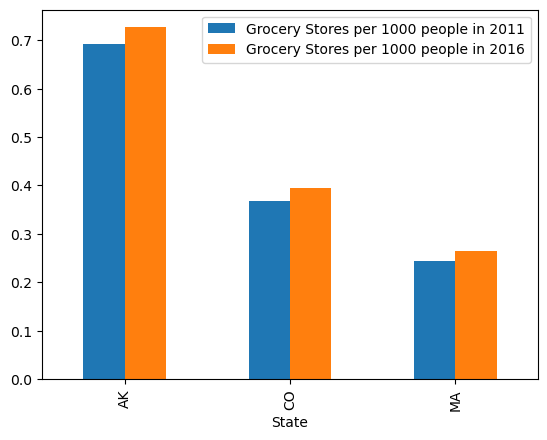

In [22]:
# plotting graph 
results_df.plot(x="State", y=["Grocery Stores per 1000 people in 2011", "Grocery Stores per 1000 people in 2016"], kind="bar") 

In [23]:
rdd = sdf.rdd

In [24]:
rdd.first()

Row(FIPS='1001', State='AL', County='Autauga', Variable_Code='LACCESS_POP10', Value=18428.439453125)

In [25]:
#2011
# Step 1: Filter the RDD
def sparkRDD():
    filtered_rdd_2011_16 = rdd.filter(lambda row: row.Variable_Code == 'GROCPTH11' or row.Variable_Code == 'GROCPTH16')
    
    # Step 2: Map to key-value pairs (State, (Value, 1))
    mapped_rdd_2011_16 = filtered_rdd_2011_16.map(lambda row: (row.State+':'+row.Variable_Code, (float(row.Value), 1,row.State, row.Variable_Code)))
    
    # # Step 3: Reduce by key to sum the values and count the counties
    reduced_rdd_2011_16 = mapped_rdd_2011_16.reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))
    
    # # Step 4: Calculate the average value per county
    final_res_rdd_2011_16 = reduced_rdd_2011_16.mapValues(lambda x: x[0] / x[1])

    diff = sc.parallelize(final_res_rdd_2011_16.map(lambda row: (row[0].split(":")[0],(row[0].split(":")[1], row[1]))).sortBy(lambda r:r[1][0]).reduceByKey(lambda a,b: b[1]-a[1])\
    .sortBy(lambda r: -r[1]).take(3))
    df_11= final_res_rdd_2011_16.filter(lambda row: row[0].split(":")[1] =="GROCPTH11" ).map(lambda row: (row[0].split(":")[0], row[1]))
    # df_16 =final_res_rdd_2011_16.filter(lambda row: row[0].split(":")[1] =="GROCPTH16" ).map(lambda row: (row[0].split(":")[0], row[1]))
    # df_11.join(df_16).join(diff).sortBy(lambda row: -row[1][1])


# # The final_res_rdd now contains (State, Average Value Per County)
%timeit -n 1 sparkRDD()

6.26 s ± 1.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
final_res_rdd_2011_16.first()

NameError: name 'final_res_rdd_2011_16' is not defined

In [ ]:
def sparkRDD():
    filtered_rdd_2011_16 = rdd.filter(lambda row: row.Variable_Code == 'GROCPTH11' or row.Variable_Code == 'GROCPTH16')
        
    # Step 2: Map to key-value pairs (State, (Value, 1))
    mapped_rdd_2011_16 = filtered_rdd_2011_16.map(lambda row: (row.State+':'+row.Variable_Code, (float(row.Value), 1,row.State, row.Variable_Code)))
    
    # # Step 3: Reduce by key to sum the values and count the counties
    reduced_rdd_2011_16 = mapped_rdd_2011_16.reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1], a[2], a[3]))
    final_res_rdd_2011_16 = reduced_rdd_2011_16.mapValues(lambda x: (x[0] / x[1] , x[2],x[3]))
    diff = sc.parallelize(final_res_rdd_2011_16.map(lambda row: (row[1][1],(row[1][2], row[1][0]))).sortBy(lambda r:r[1][0]).reduceByKey(lambda a,b: b[1]-a[1])\
        .sortBy(lambda r: -r[1]).take(3))
    final_ordered = final_res_rdd_2011_16.map(lambda row: (row[1][1], (row[1][0],row[1][2])))
    df_11 = final_ordered.filter(lambda row : row[1][1] == 'GROCPTH11')
    df_16 = final_ordered.filter(lambda row : row[1][1] == 'GROCPTH16')
    final_result = df_11.join(df_16).join(diff).map(lambda row: (row[0], row[1][0][0][0], row[1][0][1][0],row[1][1])).sortBy(lambda row: -row[3])
    
%timeit -n 1 sparkRDD()
    

In [ ]:
sparkRDD()

In [ ]:
final_res_rdd_2011_16.collect()

In [ ]:
reduced_rdd_2011_16.collect()

In [ ]:
# Collect and print the first 51 results 2011
for state, res in final_res_rdd_2011.take(51):
    print(state, res)

In [ ]:
#2016
# Step 1: Filter the RDD
filtered_rdd_2016 = rdd.filter(lambda row: row.Variable_Code == 'GROCPTH16')

# Step 2: Map to key-value pairs (State, (Value, 1))
mapped_rdd_2016 = filtered_rdd_2016.map(lambda row: (row.State, (float(row.Value), 1)))

# Step 3: Reduce by key to sum the values and count the counties
reduced_rdd_2016 = mapped_rdd_2016.reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))

# Step 4: Calculate the average value per county
final_res_rdd_2016 = reduced_rdd_2016.mapValues(lambda x: x[0] / x[1])

# The final_res_rdd now contains (State, Average Value Per County)


In [ ]:
# Collect and print the first 51 results 2016
for state, res in final_res_rdd_2016.take(51):
    print(state, res)

In [ ]:
# Assuming rdd1 and rdd2 are your RDDs and they have the format (key, value)
# Join the RDDs on the key
joined_rdd = final_res_rdd_2016.join(final_res_rdd_2011)

# Compute the difference
difference_rdd = joined_rdd.mapValues(lambda x: x[0] - x[1])

# Now you can iterate over difference_rdd
difference_rdd.foreach(lambda x: print(f"Key: {x[0]}, Difference: {x[1]}"))


In [ ]:
# Collect and print the first 51 results 2016
for state, res in difference_rdd.take(51):
    print(state, res)

In [ ]:
final_res = joined_rdd.join(difference_rdd).sortBy(lambda x:-x[1][1]).toDF().limit(3)

In [ ]:
final_res = final_res.withColumnRenamed('_1', 'State').withColumnRenamed('_2', 'Values').select('State', 'Values.*')\
.withColumnRenamed('_1', '2011-2016').withColumnRenamed('_2', 'Difference')\
.select('State', '2011-2016.*', 'Difference').withColumnRenamed('_1', '2011').withColumnRenamed('_2', '2016')

In [ ]:
final_res.show()